# Project: Iris Flower Classification using K-Means
In this project, we implement K-Means algorithm from scratch.

The K-Means algorithm consists of the following steps:

1. Place k random centroids for the initial clusters.
2. Assign data samples to the nearest centroid.
3. Update centroids based on the above-assigned data samples.
4. Repeat Steps 2 and 3 until convergence.

## Part 1: Load and Inspect the data

In [2]:
import numpy as np

In [3]:
# load the dataset
# The Iris dataset consists of measurements of sepals and petals of 3 different plant species:
# Iris setosa, Iris versicolor, Iris virginica
from sklearn import datasets
iris = datasets.load_iris()

In [4]:
print(iris.data)
# The iris.target values give the ground truth for the Iris dataset. Ground truth, 
# in this case, is the number corresponding to the flower that we are trying to learn
print(iris.target)
# Descriptions of the data
print(iris.DESCR)
# Column 0: Sepal length
# Column 1: Sepal width
# Column 2: Petal length
# Column 3: Petal width

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

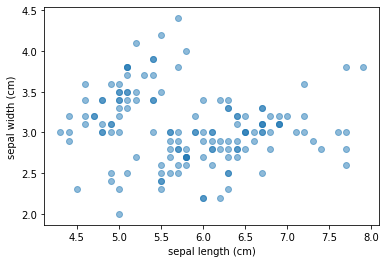

In [32]:
import matplotlib.pyplot as plt

samples = iris.data
# Column 0: Sepal length
x = samples[:,0]
# Column 1: Sepal width
y = samples[:,1]

sepal_length_width = np.array(list(zip(x, y)))
# In order to better see the overlapping results, we'll also use the alpha keyword to adjust the transparency level
plt.scatter(x, y, alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Part 2: Place random centroids 

The goal of clustering is to separate data so that data similar to one another are in the same group, 
while data different from one another are in different groups. So two questions arise:

- How many groups do we choose?
- How do we define similarity?

*K-Means* is the most popular and well-known clustering algorithm, and it tries to address these two questions.

- The “K” refers to the number of clusters (groups) we expect to find in a dataset.
- The “Means” refers to the average distance of data to each cluster center, also known as the centroid, 
which we are trying to minimize

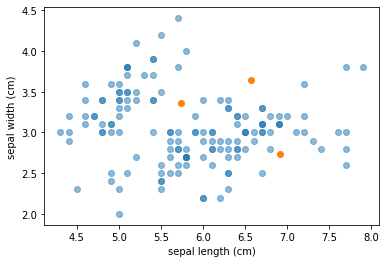

In [33]:
# Because we expect there to be three clusters (for the three species of flowers), 
# let’s implement K-Means where the k is 3.
k = 3
# Create x coordinates of k random centroids
centroids_x = np.random.uniform(min(x), max(x), size = k)

# Create y coordinates of k random centroids
centroids_y = np.random.uniform(min(y), max(y), size = k)

# Create centroids array
centroids = np.array(list(zip(centroids_x, centroids_y)))

# Make a scatter plot of x, y
plt.scatter(x, y, alpha=0.5)

# Make a scatter plot of the centroids
plt.scatter(centroids_x, centroids_y)

# Display plot
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

## Part 3: Assign data samples to the nearest centroid and update it

In [50]:
# sample1 = samples[:,0:2]
# Create an array called labels that will hold the cluster labels for each data point. 
# Its size should be the length of the data sample.
labels = np.zeros(len(samples))
# Create an array called distances that will hold the distances for each centroid. It should have the size of k
distances = np.zeros(k)

In [51]:
# Distance formula
def distance(a,b):
  return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5

In [53]:
# This is the part of the algorithm where we repeatedly execute Step 2 and 3 until the centroids stabilize (convergence).
# Initialize error:
error = np.zeros(3)
for i in range(k):
  error[i] = distance(centroids[i], centroids_old[i])

In [71]:
# step 4 for convergence 
while error.all() != 0:
    
    # Assign data samples to the nearest centroid (step 2)
    for s in range(len(samples)):
        for i in range(k):
            # Distances to each centroide
            distances [i] = distance(sepal_length_width[s],centroids[i])
        # Assign to the closest centroid
        cluster = np.argmin(distances)
        # Assign the cluster to each index of the labels array
        labels [s] = cluster
    #Save the old centroids value before updating
    from copy import deepcopy
    centroids_old = deepcopy(centroids)
    
    # Update the centroids (step 3)
    for i in range(k):
        points = np.array([sepal_length_width[j] for j in range(len(samples)) if labels[j] == i])
        centroids[i] = np.mean(points, axis=0)
    # update error 
    for i in range(k):
        error[i] = distance(centroids[i], centroids_old[i])

In [72]:
print(centroids_old)
print("- - - - - - - - - - - - - -")
print(centroids)

[[5.01403509 3.3122807 ]
 [7.07857143 3.11071429]
 [6.03846154 2.81076923]]
- - - - - - - - - - - - - -
[[5.01403509 3.3122807 ]
 [7.03225806 3.08709677]
 [6.01129032 2.80806452]]


## Part 4: Validation

In [78]:
# data of three new Iris to validate the model 
new_samples = np.array([[5.7, 4.4, 1.5, 0.4],[6.5, 3. , 5.5, 0.4],[5.8, 2.7, 5.1, 1.9]])
samples = iris.data
# Column 0: Sepal length
n_x = new_samples[:,0]
# Column 1: Sepal width
n_y = new_samples[:,1]

sepal_length_width_n = np.array(list(zip(n_x, n_y)))

In [80]:
# Assign data samples to the nearest centroid (step 2)
new_labels = np.zeros(len(new_samples))
for s in range(len(new_samples)):
    for i in range(k):
        # Distances to each centroide
        distances [i] = distance(sepal_length_width_n[s],centroids[i])
    # Assign to the closest centroid
    cluster = np.argmin(distances)
    # Assign the cluster to each index of the labels array
    new_labels [s] = cluster

In [81]:
new_labels

array([0., 2., 2.])